#Get all the Required Files

In [58]:
import subprocess
print((subprocess.check_output("lscpu", shell=True).strip()).decode())

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [59]:
!git clone https://github.com/DevashishX/AbstractClustering.git; 

fatal: destination path 'AbstractClustering' already exists and is not an empty directory.


In [0]:
!cp -r AbstractClustering/* ./.

In [3]:
!ls -alFh

total 84M
drwxr-xr-x 1 root root 4.0K Feb 27 13:14 ./
drwxr-xr-x 1 root root 4.0K Feb 27 12:02 ../
drwxr-xr-x 9 root root 4.0K Feb 27 12:04 AbstractClustering/
-rw-r--r-- 1 root root  39M Feb 27 14:52 cleaned.7z
-rw-r--r-- 1 root root  90K Feb 27 14:52 ClusterKEuclid.ipynb
drwxr-xr-x 1 root root 4.0K Feb 19 17:12 .config/
-rw-r--r-- 1 root root 3.7K Feb 27 14:52 convert_repository_json.py
drwxr-xr-x 2 root root 4.0K Feb 27 12:04 CORE_files/
-rw-r--r-- 1 root root  33K Feb 27 14:52 CORE.html
-rw-r--r-- 1 root root  48K Feb 27 14:52 CreateSentenceEmbedding.ipynb
drwxr-xr-x 2 root root 4.0K Feb 27 12:04 dataset/
-rw-r--r-- 1 root root  95K Feb 27 14:52 Devashish_word2vec_cluster.ipynb
-rw-r--r-- 1 root root 978K Feb 27 13:14 downloaded_Mega_Sample_centroid.pkl
drwx------ 4 root root 4.0K Feb 27 13:04 drive/
-rw-r--r-- 1 root root  27K Feb 27 14:52 example_tags.txt
-rw-r--r-- 1 root root  37K Feb 27 14:52 h_cluster.ipynb
drwxr-xr-x 2 root root 4.0K Feb 27 12:17 .ipynb_checkpoints/
-rw-r--r

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
import seaborn as sns
import json
import sys
import codecs
import os
from collections import defaultdict, Counter
import datetime
import time

In [14]:
start_time = time.time()
start_datetime = datetime.datetime.now()
print("start_time: ", start_time)
print("start_datetime: ", start_datetime)
# print(datetime.datetime.now()-start_datetime)

start_time:  1582816754.8168468
start_datetime:  2020-02-27 15:19:14.816892


In [44]:
embedDir = "./MegaSentEmbs/"
dumpdir = "./dump/"
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
filenum = len(filelist)
filenum = int(filenum)
# filenum = 5
# print(filelist)
smalllist = filelist[:int(filenum)]
print("Length of Smalllist: ", len(smalllist))
print("smalllist: ", smalllist)

Length of Smalllist:  116
smalllist:  ['./MegaSentEmbs/repository_embedding_100_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_101_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_102_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_103_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_104_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_105_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_106_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_107_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_108_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_109_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_10_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_110_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_111_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_112_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_116_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_117_2013-03-18.pkl', './MegaSentEmbs/repository_embeddi

#Number of Records

In [0]:
recnum = 30000

#Read all the pandas dataframes

In [49]:
%%time
megadf = pd.DataFrame()
for f in smalllist:
    tempdf = pd.read_pickle(f)
    # print(tempdf.shape)
    megadf = megadf.append(tempdf, ignore_index = True)
    # if megadf.shape[0] >= recnum:
    #     megadf = megadf[:recnum]
    #     break

megadf = megadf.sample(recnum, random_state=42)
print(megadf.shape)
print(megadf.head())

(30000, 4)
             id  ...                                          embedding
267625  1586358  ...  [0.2519249216165414, 0.098715185112782, -0.218...
132693  1514579  ...  [0.45556149999999995, 0.46300600000000003, 0.1...
42457   1352013  ...  [0.3578503426774432, 0.19982163346099166, 0.19...
11052   9050181  ...  [0.1143842923148343, 0.10179413176365848, 0.07...
13984    397771  ...  [0.3376635693894921, -0.039414062713478144, 0....

[5 rows x 4 columns]
CPU times: user 7.3 s, sys: 931 ms, total: 8.23 s
Wall time: 8.32 s


In [52]:
predata = megadf["embedding"]

data = np.matrix(predata.to_list())
print(data.shape)
sqrt_k = int(np.sqrt(data.shape[0]))
print(int(sqrt_k))


(30000, 250)
173


#Number of Clusters

In [53]:
# k = int(sqrt_k)
k = 500
print("k: ", k)

k:  500


In [54]:
%%time
print("Starting Clustering Process")
kmeans = cluster.KMeans(n_clusters=k, verbose=1, n_jobs=-1)
kmeans.fit(data)
print("done")
print("k_means.fit(data) Done!")

Starting Clustering Process
done
k_means.fit(data) Done!
CPU times: user 183 ms, sys: 224 ms, total: 407 ms
Wall time: 9min 35s


In [55]:
print("hello")

hello


In [0]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
megadf["clusterlabel"]=labels
# megadf["centroids"] = centroids
# centroidDF = pd.DataFrame(centroids)


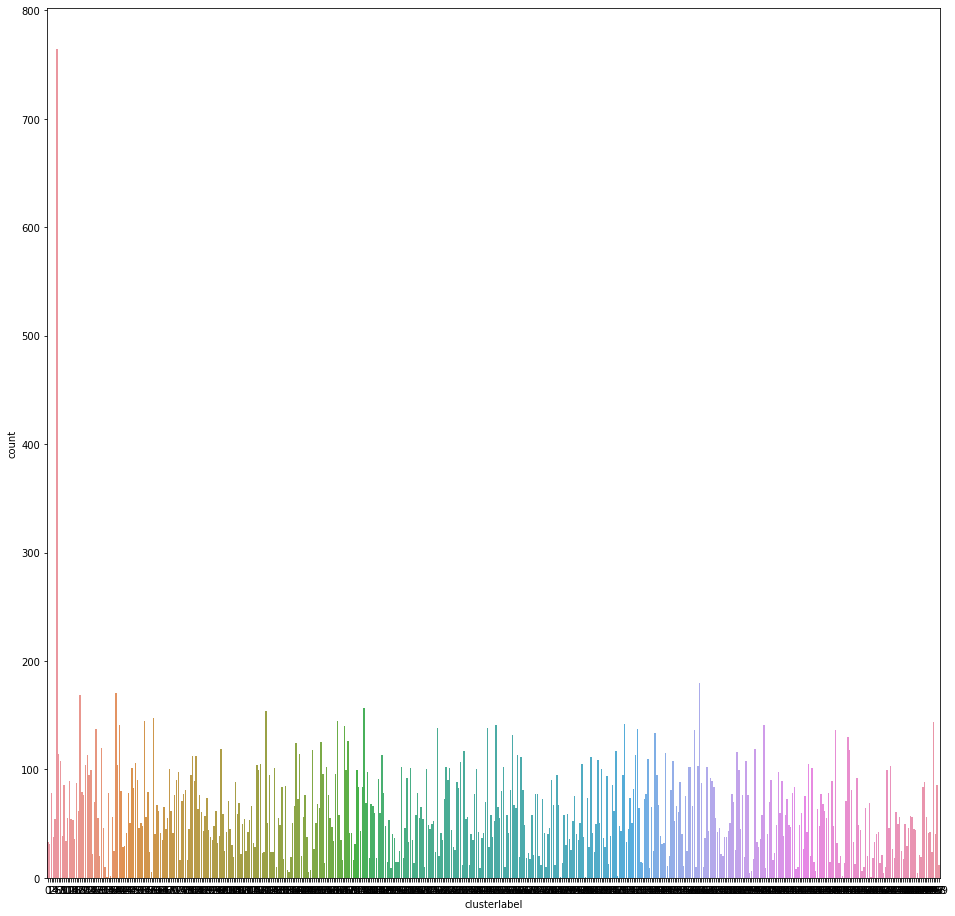

In [57]:
plt.figure(figsize=(16,16))
snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot

In [0]:
snsplot.figure.savefig("Kmeans_30KS_500C_outputplt.png")

In [0]:
# # import dtale
# s = megadf[megadf["clusterlabel"] == 48].loc[:, ["title", "abstract"]]
# # megadf.columns
# # dtale.show(s)
# s

In [0]:
# sample = pd.DataFrame()
# for n in range(k):
#     temp = megadf[megadf["clusterlabel"] == n].loc[:, :]
#     sample = sample.append(temp.head(50), ignore_index=True)
#     print("Cluster Number: ", n)
    # print(temp.head(100).loc[:, ["id", "title", "abstract", "clusterlabel"]])
    

In [0]:
megadf.to_pickle("Kmeans_30KS_500C.pkl")

In [0]:
!cp Kmeans_30KS_500C.pkl ./drive/My\ Drive/.

In [0]:
# centroidDF = pd.DataFrame(centroids)
centroidDF = pd.DataFrame(centroids)
centroidDF.to_pickle("Kmeans_30KS_500Ccentroid.pkl")
!cp Kmeans_30KS_500Ccentroid.pkl ./drive/My\ Drive/.

In [63]:
end_time = time.time()
end_datetime = datetime.datetime.now()
print("end_time:",  end_time)
print("end_datetime: ", end_datetime)
print("done! {}".format(round(end_time-start_time, 2)))
print("Time taken: ", str(end_datetime-start_datetime))

end_time: 1582819509.2418888
end_datetime:  2020-02-27 16:05:09.241915
done! 2754.43
Time taken:  0:45:54.425023


In [64]:
sub = megadf.loc[:, ["title", "abstract", "clusterlabel"]]
sub.tail()

,title,abstract,clusterlabel
18574,Trace (Layered Neck-piece and Feather Wrap),"[exhibition, two, large, printed, feather, bod...",476
44937,"Equivalence of conservative, free, linear prog...","[program, schema, defines, class, program, ide...",98
127685,The impact of structural adjustment programmes...,"[requirement, doctor, business, administration...",251
159718,"Neville Street, Water Lane, Great Wilson Street","[16th, february, neville, street, foreground, ...",29
142878,Paperless examination boards promote wider and...,"[series, development, since, inception, sits, ...",38
